In [1]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\erinap\AppData\Local\Temp\ipykernel_10012\1336676252.py:29: RuntimeWarning: divide by zero encountered in true_divide
  norm_phi = 1. / np.sin(phi_sel_deg)
C:\Users\erinap\AppData\Local\Temp\ipykernel_10012\1336676252.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


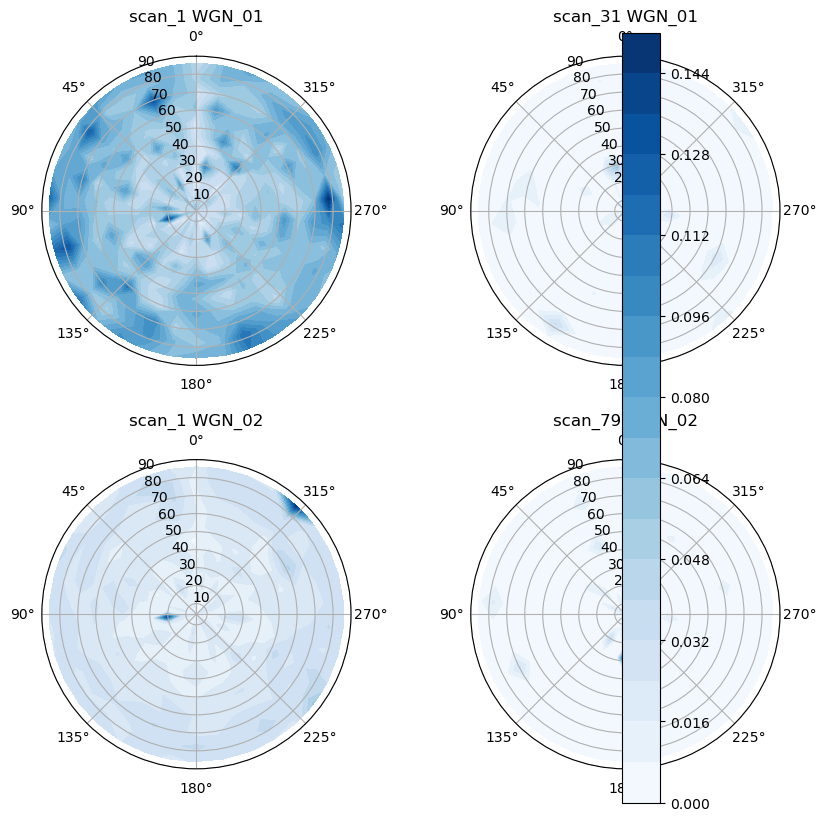

In [2]:
expn = ['WGN_01', 'WGN_02']
idx_phi = 23
idx_vol = 4
idx_theta = 24

# Set up a figure with two subplots for each expn
fig, axs = plt.subplots(len(expn), 2, subplot_kw=dict(polar=True), figsize=(8, 5 * len(expn)))

for i in range(len(expn)):
    expns = expn[i]
    file_path = 'C:\\Users\\erinap\\OneDrive - Universitetet i Oslo\\Documents\\PhD\\# Data to work on\\2022_WGN\\txts\\' + expns + '_fracprops_32bit_cropped.txt'

    # Read the file into a NumPy array
    data_array = np.loadtxt(file_path, skiprows=1)
    unique_values = np.unique(data_array[:, 0])
    start_id = 0
    last_id = len(unique_values) - 1

    idxs = [start_id, last_id]

    for j in range(len(idxs)):
        idx = idxs[j]
        subset_data = data_array[data_array[:, 0] == unique_values[idx], :]
        phi1 = subset_data[:, idx_phi]
        theta1 = subset_data[:, idx_theta]
        theta1[theta1 < 0] += 360
        
        phi_sel_deg = np.deg2rad(phi1)
        norm_phi = 1. / np.sin(phi_sel_deg)
        # conditional sentence
        if np.any(np.isinf(norm_phi)):
            sorted_norm = np.sort(norm_phi)[::-1]
            second_largest_norm = sorted_norm[1]  # Index 1 corresponds to the second largest element
            # Replace infinite weights with a large finite value
            inf_indices = np.isinf(norm_phi)
            norm_phi[inf_indices] = second_largest_norm
        else:
            second_largest_norm = None

        weights = norm_phi * subset_data[:, idx_vol] / np.sum(subset_data[:, idx_vol])

        # Prepare histogram
        discreti = 20000

        phi1_bins = np.linspace(0., 90., np.max((int(len(phi1) / discreti), 12)))
        N_theta = np.max((int(len(theta1) / discreti), 36))
        d_theta = 2. * np.pi / (N_theta + 1.)
        theta_bins = np.linspace(-d_theta / 2., 2. * np.pi + d_theta / 2., N_theta)

        # Use weights in histogram
        Occur, theta_edges, r_edges = np.histogram2d(theta1 % (2. * np.pi), phi1, bins=(theta_bins, phi1_bins), weights=weights)

        # I EXTRACT THE MIDDLE OF THE BIN:
        phi1_mid = .5 * (r_edges[:-1] + r_edges[1:])
        theta_mid = .5 * (theta_edges[:-1] + theta_edges[1:])

        # Then you plot your polar plot:
        cax = axs[i, j].contourf(theta_mid, phi1_mid, Occur.T, 20, cmap='Blues')
        axs[i, j].set_theta_offset(np.pi / 2.0)
        axs[i, j].set_rmax(90)
        axs[i, j].set_title(f'scan_{idx + 1} {expns}')

# Add colorbar
fig.colorbar(cax, ax=axs, orientation='vertical', pad=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [3]:
print(weights)

[2.82250905e-03 4.74767023e-06 2.71166245e-05 ... 2.87250703e-06
 2.95747945e-06 3.42748997e-06]
